## Mini-Batch K-均值
Mini-Batch K-均值是 K-均值的修改版本，它使用小批量的样本而不是整个数据集对群集质心进行更新，这可以使大数据集的更新速度更快，并且可能对统计噪声更健壮。

...我们建议使用 k-均值聚类的迷你批量优化。与经典批处理算法相比，这降低了计算成本的数量级，同时提供了比在线随机梯度下降更好的解决方案。
—源自：《Web-Scale K-均值聚类》2010

它是通过 MiniBatchKMeans 类实现的，要优化的主配置是“ n _ clusters ”超参数，设置为数据中估计的群集数量。下面列出了完整的示例。

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


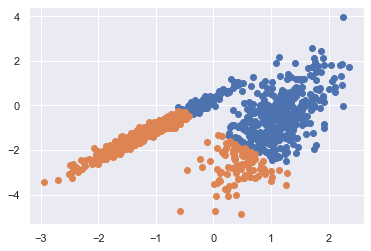

In [1]:
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
import seaborn as sns
sns.set()

# mini-batch k均值聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans

# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = MiniBatchKMeans(n_clusters=2)
# 模型拟合
model.fit(X)

# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)

for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
# 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

运行该示例符合训练数据集上的模型，并预测数据集中每个示例的群集。然后创建一个散点图，并由其指定的群集着色。在这种情况下，会找到与标准 K-均值算法相当的结果。